In [1]:
import copy
import warnings

import numpy as np
import xarray as xr

import sys, pdb, traceback

import matplotlib.pyplot as plt

import rotunno as rt
import qian_helpers
import rotunno_helpers

import copy

import scipy as sp

In [2]:
import mpmath
erfi = np.frompyfunc(mpmath.erfi, 1, 1)

In [3]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport rotunno, rotunno_helpers, channel_helpers, qian_helpers, piecewise_N_helpers, continuous_N_helpers, convective_helpers

In [4]:
delT = 20
.5*9.807*delT/300/(12*3600)

7.56712962962963e-06

In [292]:
.5*9.807*delT/300/(24*3600)

3.783564814814815e-06

In [6]:
# YMC parameters
L_star = 50*1e3 # m
omega = 2*np.pi/(24*3600)
h = 4*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
L = omega*L_star/(N1*h)
# Q0 = 1.2e-5
# Q0=7.57e-6
Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(-11.5*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

In [5]:
# YMC convection parameters
L_star = 100*1e3 # m
omega = 2*np.pi/(24*3600)
h = 12*1e3
D_star = 4*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
N2 = 0.025
N = N2/N1
L = omega*L_star/(N1*h)
Q0 = 6e-6
# Q0=7.57e-6
# Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 15e3
H2_star_tl = 19e3
H1_star_pw = 17e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h
H1_pw = H1_star_pw / h
D = D_star / h

In [12]:
# YMC test
L_star = 100*1e3 # m
omega = 2*np.pi/(24*3600)
h = 8*1e3
D_star = 6*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
N2 = 0.025
N = N2/N1
L = omega*L_star/(N1*h)
Q0 = 6e-6
# Q0=7.57e-6
# Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 15e3
H2_star_tl = 19e3
H1_star_pw = 17e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h
H1_pw = H1_star_pw / h
D = D_star / h

In [110]:
# Inversion parameters
L_star = 10*1e3 # m
omega = 2*np.pi/(24*3600)
h = 1*1e3
h1_star = 2*1e3
H1 = h1_star/h
N1 = 0.01
L = omega*L_star/(N1*h)
Q0 = 1.2e-5
# Q0=7.57e-6
phi = 0
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 1.5e3
H2_star_tl = 2.5e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h

In [10]:
26/8

3.25

In [47]:
# ds_rotunno = rt.solve_rotunno_case_two(xiN=61, zetaN=31, tauN=32, kN=1000,
#                                        xi0=0.1, beta=beta, Atilde=Atilde)
# ds_qian = rt.solve_qian(xiN=61, zetaN=31, tauN=4, sN=1000, U=0.6, L=0.1, alpha=3)
# ds_pwN = rt.solve_continuous_N(xiN=151, zetaN=41, tauN=16, sN=1000, L=1, R=0.4, 
#                                zetaT1=20, zetaT2=40, alpha=3, save=False)
# ds_channel = rt.solve_channel(xiN=121, zetaN=61, tauN=32, sN=1000, U=0.625, 
#                               d=10, alpha=3, sigma=4, heat_island=False)


# ds_rotunno = rt.solve_rotunno_case_one(xiN=41, zetaN=21, tauN=16, xipN=200, zetapN=200,
#                                        xi0=0.1, beta=beta, Atilde=Atilde)

# ds_cN = rt.solve_continuous_N(
#     xN=41, zN=21, tN=4, sN=500, L=L, N=3, H1=H1_tl, H2=H2_tl, save=True, A=A)

In [13]:
# ds_rotunno = rt.solve_rotunno_case_two(xiN=61, zetaN=31, tauN=32, kN=1000,
#                                        xi0=0.1, beta=beta, Atilde=Atilde)
# ds_qian = rt.solve_qian(xiN=61, zetaN=31, tauN=4, sN=1000, U=0.6, L=0.1, alpha=3)
# ds_pwN = rt.solve_continuous_N(xiN=151, zetaN=41, tauN=16, sN=1000, L=1, R=0.4, 
#                                zetaT1=20, zetaT2=40, alpha=3, save=False)
# ds_channel = rt.solve_channel(xiN=121, zetaN=61, tauN=32, sN=1000, U=0.625, 
#                               d=10, alpha=3, sigma=4, heat_island=False)


# ds_rotunno = rt.solve_rotunno_case_one(xiN=41, zetaN=21, tauN=16, xipN=200, zetapN=200,
#                                        xi0=0.1, beta=beta, Atilde=Atilde)

ds_cN = rt.solve_continuous_N_convective(
    xN=161, zN=81, tN=16, sN=1000, L=L, N=N, H1=H1_tl, H2=H2_tl, save=True, A=A, D=D, z_top=3.25)

Initialising
Pre-calculating Coefficients
Pre-calculating middle sub-domain forcing integrals.
Beginning integration.
Integrating lower sub-domain.
Integrating middle sub-domain
Integrating upper sub-domain.
Saving.


In [14]:
ds_pwN = rt.solve_piecewise_N_convective(
    xN=161, zN=81, tN=16, sN=1000, L=L, D=D, N=N, H1=H1_pw, save=True, A=A, z_top=3.25)

Initialising.
Beginning integration.
Integrating lower sub-domain.
1 of 122
2 of 122
3 of 122
4 of 122
5 of 122
6 of 122
7 of 122
8 of 122
9 of 122
10 of 122
11 of 122
12 of 122
13 of 122
14 of 122
15 of 122
16 of 122
17 of 122
18 of 122
19 of 122
20 of 122
21 of 122
22 of 122
23 of 122
24 of 122
25 of 122
26 of 122
27 of 122
28 of 122
29 of 122
30 of 122
31 of 122
32 of 122
33 of 122
34 of 122
35 of 122
36 of 122
37 of 122
38 of 122
39 of 122
40 of 122
41 of 122
42 of 122
43 of 122
44 of 122
45 of 122
46 of 122
47 of 122
48 of 122
49 of 122
50 of 122
51 of 122
52 of 122
53 of 122
54 of 122
55 of 122
56 of 122
57 of 122
58 of 122
59 of 122
60 of 122
61 of 122
62 of 122
63 of 122
64 of 122
65 of 122
66 of 122
67 of 122
68 of 122
69 of 122
70 of 122
71 of 122
72 of 122
73 of 122
74 of 122
75 of 122
76 of 122
77 of 122
78 of 122
79 of 122
80 of 122
81 of 122
Integrating upper sub-domain.
82 of 122
83 of 122
84 of 122
85 of 122
86 of 122
87 of 122
88 of 122
89 of 122
90 of 122
91 of 122
92

In [180]:
ds_pwN = xr.open_dataset('../datasets/paper_pwc_N_3_low_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_tl_N_3_low_fixed.nc')

In [111]:
ds_pwN = xr.open_dataset('../datasets/paper_pwc_N_one_third_low_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_tl_N_one_third_low_fixed.nc')

In [86]:
ds_pwN = xr.open_dataset('../datasets/paper_pwn_YMC_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_cn_YMC_fixed.nc')

In [6]:
ds_pwN = xr.open_dataset('../datasets/strat_1.nc')
ds_cN = xr.open_dataset('../datasets/strat_2.nc')

In [7]:
omega = 2*np.pi/(24*3600)
# ds_rotunno_dim = rt.redimensionalise_rotunno(copy.deepcopy(ds_rotunno), h=h, f=f, N=N)
# ds_channel_dim = rt.redimensionalise_channel(copy.deepcopy(ds_channel), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_qian_dim = rt.redimensionalise_qian(copy.deepcopy(ds_qian), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_pwN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_pwN), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_cN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_cN), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
ds_pwN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_pwN), h=h, N=N1, Q0=Q0)
ds_cN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_cN), h=h, N=N1, Q0=Q0)

/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/python_scripts/rotunno.py:548: UserWarning: Buoyancy not present.
  warnings.warn('Buoyancy not present.')


Plotting u.
Plotting u.
Plotting u.
Plotting u.


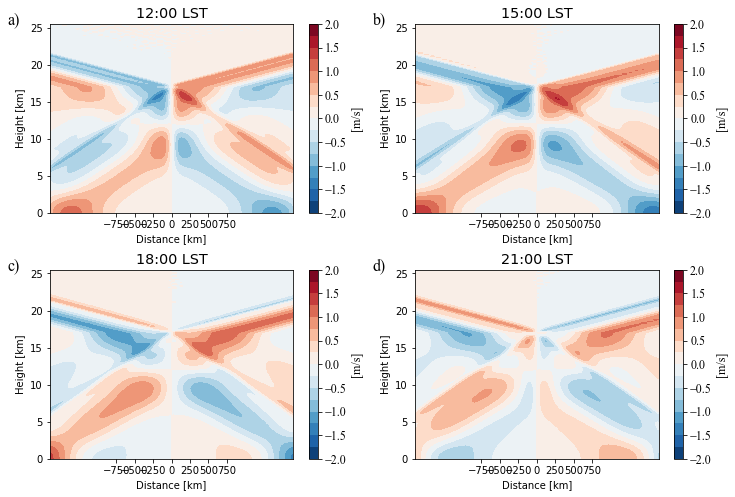

In [8]:
test = ds_pwN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_pwN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=1).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelCont(test, var=var, t_list=[0,2,4,6], cbar_steps=10)
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/soln_pwc_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.
Plotting u.
Plotting u.


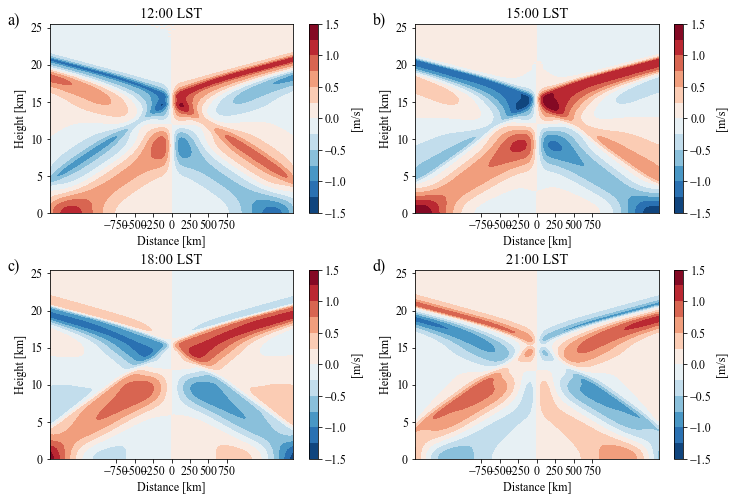

In [9]:
test = ds_cN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_cN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=2)
# test = ds_cN_dim.isel(mode=0).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelCont(test, var=var, t_list=[0,2,4,6], cbar_steps=10)
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/soln_cN_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.


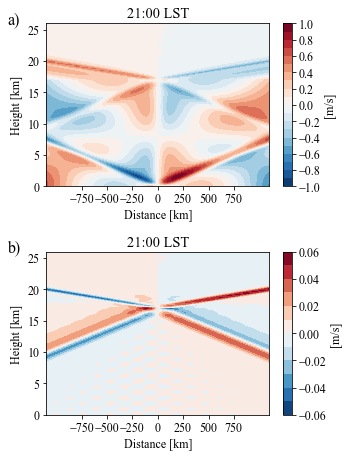

In [19]:
rt.forcingComparison(ds_pwN_dim, var='u', t=[6, 6], cbar_steps=[10, 10, 10])
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/forcing_pwc_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.
Plotting u.


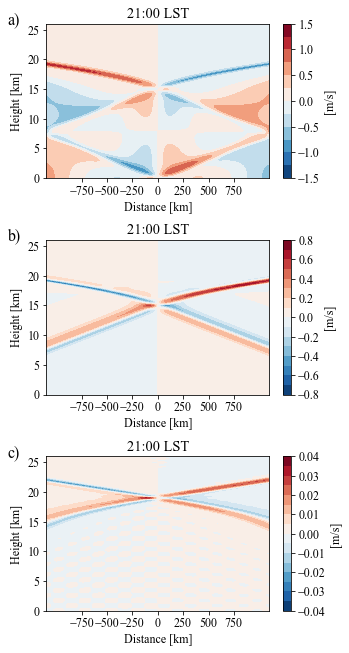

In [20]:
rt.forcingComparison(ds_cN_dim, var='u', t=[6, 6, 6], cbar_steps=[10, 10, 10])
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/forcing_cn_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

In [342]:
ds_pwN_dim.z[2]-ds_pwN_dim.z[1]

<xarray.DataArray 'z' ()>
array(212.5)

In [72]:
test = ds_pwN_dim['psi'].isel(t=0).sum(dim='mode').isel(forcing=0)/212.5

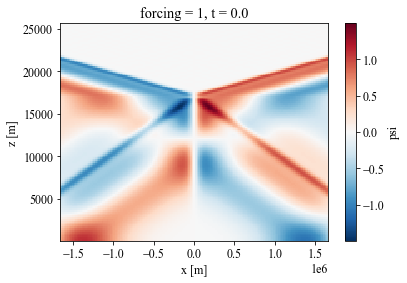

In [73]:
test.diff(dim='z', n=1).plot()

Plotting u.
Plotting u.
Plotting u.


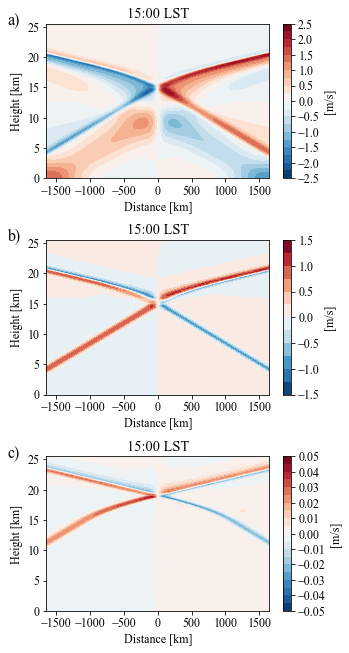

In [95]:
rt.forcingComparison(ds_cN_dim, var='u', t=[2, 2, 2], cbar_steps=[10, 10, 10])
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/forcing_cn_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting w.
Plotting velocity.


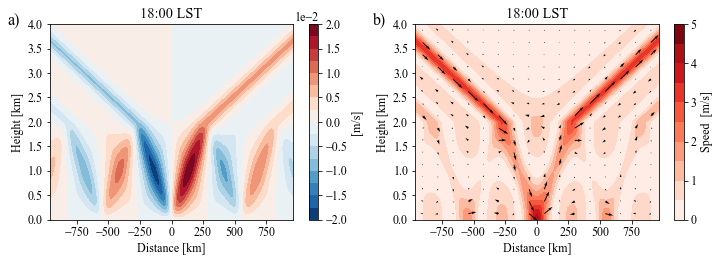

In [199]:
test = ds_pwN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_cN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=2)
# test = ds_cN_dim.isel(mode=0).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelDiffTypes(test, t=4)
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/diff_types_cN_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting w.
Plotting velocity.


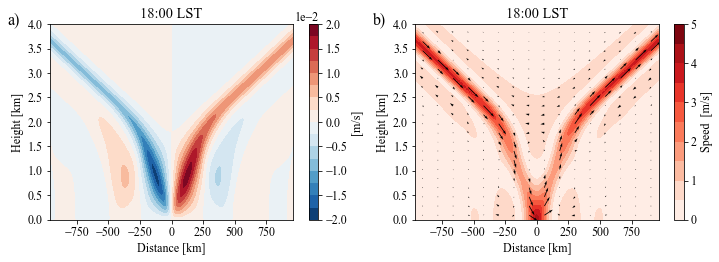

In [200]:
test = ds_cN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_cN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=2)
# test = ds_cN_dim.isel(mode=0).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelDiffTypes(test, t=4)
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/diff_types_cN_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.


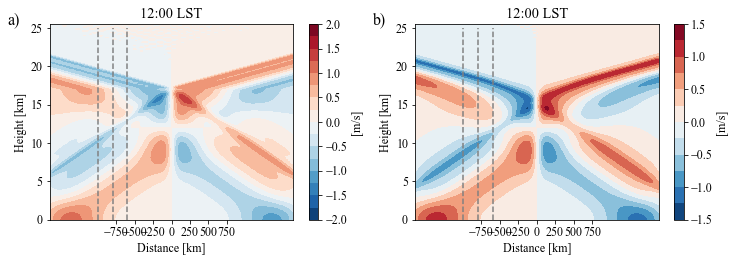

In [10]:
test1 = ds_pwN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
test2 = ds_cN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
rt.contComparison(test1, test2, t=0, var='u')

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/YMC_comparison_{}_{}_test.png'.format('vel', 0), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting psi.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15


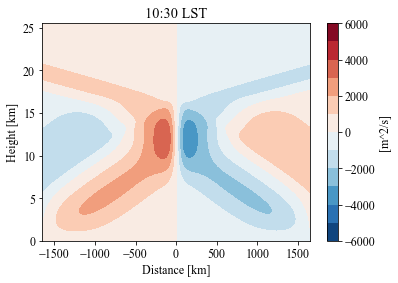

In [71]:
# rt.animateCont(ds_channel_dim.sel(mode=[1,2,3]).sum(dim='mode', keep_attrs=True).squeeze(),var='theta_q')
# rt.animateCont(ds_rotunno_dim, var='psi')

rt.animateCont(ds_pwN_dim.sel(mode=[1,2]).sum(dim='mode', keep_attrs=True).sel(forcing=1).squeeze(), var='psi')
# rt.animateCont(ds_pwN_dim.sel(mode=[1,2]).sum(dim='mode', keep_attrs=True).isel(forcing=1).squeeze(), var='u')
# rt.animateCont(ds_qian_dim.sel(mode=[1]).sum(dim='mode', keep_attrs=True).squeeze(),  var='theta_w')

# rt.animateCont(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze(),  var='theta_w')
# rt.animateCont(ds_qian_dim.sel(mode=[2]).sum(dim='mode', keep_attrs=True).squeeze(),  var='psi')
# for i in np.arange(1,7):
#     rt.animateCont(ds_qian_dim.sel(submode=i),  var='bw')
# rt.animateCont(ds_qian_dim.sel(submode=[2,3,4,5,6]).sum(dim='submode', keep_attrs=True).squeeze(),'bw')
# rt.animateCont(ds_qian_dim.sel(mode=2).squeeze(),  var='psi')

In [109]:
# rt.animateVelocity(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze()); plt.show()
test = ds_cN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
rt.animateVelocity(test) 

Plotting velocity.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15


In [11]:
def plot_hov(
        ds, x_list=[1000e3], var='u', signed=True, cmap='RdBu_r',
        fig=None, ax=None, c_steps=20, step_size=None, abs_max=None):
    rt.init_fonts()
    ds_cs = ds[var].sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True).squeeze()
    ds_cs_sum = ds_cs.sel(x=x_list[0], method='nearest')
    
    for i in range(1, len(x_list)):
        ds_cs_sum += ds_cs.sel(x=x_list[i], method='nearest')
        
    ds_cs_sum = ds_cs_sum
    ds_cs = ds_cs_sum
    
#     ds_cs = ds_cs.sel(x=-50e3, method='nearest')+ds_cs.sel(x=-6000e3, method='nearest')
    
    if (fig is None) or (ax is None):
        fig, ax = plt.subplots(figsize=(6, 3))
        
    plt.sca(ax)

    varMin = np.min(ds_cs)
    varMax = np.max(ds_cs)

    if abs_max is None:
        abs_max = np.max([np.abs(varMin), np.abs(varMax)])

    start, stop, step = rt.nice_bounds(-abs_max, abs_max, c_steps)
    if step_size is not None:
        levels = np.arange(start, stop+step_size, step_size)
    else:
        levels = np.arange(start, stop+step, step)

    try:
        if ds_cs.z.attrs['units'] == 'm':
            z = ds.z/1000
            t = ds.t/3600
            plt.xlabel('Time [hour LST]')
            plt.ylabel('Height [km]')
        else:
            z = ds.z
            t = ds.t
            plt.xlabel('Time [' + ds.t.attrs['units'] + ']')
            plt.ylabel('Height [' + ds.z.attrs['units'] + ']')
    except:
        for var in ds_cs.keys():
            ds_cs[var].attrs['units'] = '?'
    t += 12

    contourPlot = plt.contourf(
        np.concatenate([t-24,t,t+24,[48+12]]), z, 
        np.concatenate([
            ds_cs.values.T,
            ds_cs.values.T, 
            ds_cs.values.T, 
            ds_cs.values.T[:,[0]]], axis=1),
        levels=levels, cmap=cmap)

    cbar = plt.colorbar(contourPlot)
    cbar.set_ticks(levels[::2])
    cbar.set_label('[' + ds[var].attrs['units'] + ']')
      
#     plt.title(var + ' [' + ds[var].attrs['units'] + ']')
    dt = 6
    hours = np.arange(-12,48+dt+12,dt)
    plt.xticks(hours, labels=(hours%24))
    plt.yticks(np.arange(0,30,5))
    plt.ylim([0,25])
    plt.xlim([0,48])
    fig.patch.set_facecolor('white')

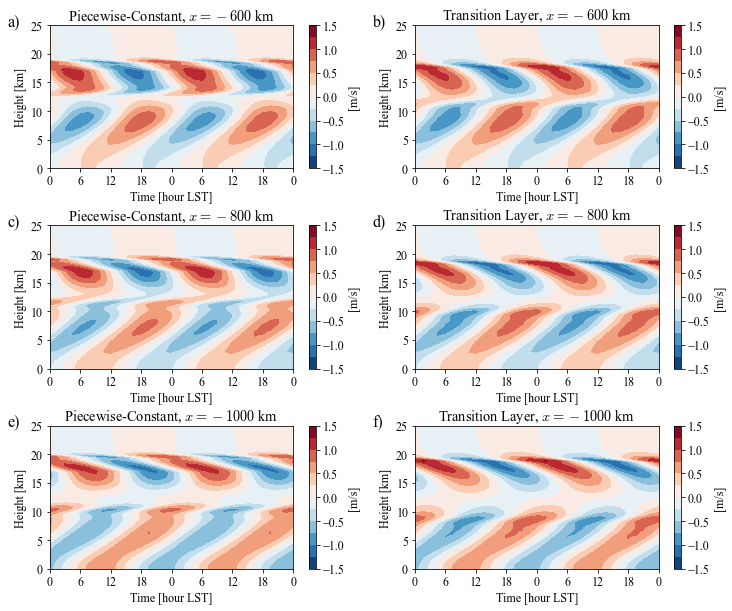

In [17]:
test = ds_cN_dim

plt.close('all')
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

plot_hov(ds_pwN_dim, x_list=[-600e3], var='u', fig=fig, ax=axes[0,0], step_size=.25)
axes[0,0].set_title('Piecewise-Constant, $x=-600$ km')
plot_hov(ds_pwN_dim, x_list=[-800e3], var='u', fig=fig, ax=axes[1,0], step_size=.25)
axes[1,0].set_title('Piecewise-Constant, $x=-800$ km')
plot_hov(ds_pwN_dim, x_list=[-1000e3], var='u', fig=fig, ax=axes[2,0], step_size=.25)
axes[2,0].set_title('Piecewise-Constant, $x=-1000$ km')

plot_hov(ds_cN_dim, x_list=[-600e3], var='u', fig=fig, ax=axes[0,1], step_size=.25)
axes[0,1].set_title('Transition Layer, $x=-600$ km')
plot_hov(ds_cN_dim, x_list=[-800e3], var='u', fig=fig, ax=axes[1,1], step_size=.25)
axes[1,1].set_title('Transition Layer, $x=-800$ km')
plot_hov(ds_cN_dim, x_list=[-1000e3], var='u', fig=fig, ax=axes[2,1], step_size=.25)
axes[2,1].set_title('Transition Layer, $x=-1000$ km')

rt.make_subplot_labels(axes.flatten())
plt.subplots_adjust(hspace=.4)
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/figures/YMC_hovmoller_alt.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

In [9]:
g=9.807
ds_pwN_dim['theta_q'] = (ds_pwN_dim.bq)*theta0/g
ds_pwN_dim['theta_w'] = (ds_pwN_dim.bw)*theta0/g
ds_pwN_dim['theta_q'].attrs['units'] = 'K'
ds_pwN_dim['theta_w'].attrs['units'] = 'K'

NameError: name 'ds_pwN_dim' is not defined

In [30]:
H1 = 4
# H2 = 10
N = 4
k = 4
A0 = 1
m = k/A0
delta = 0.01
H2 = np.arange(H1+delta,H1+1, delta)
X, Y = continuous_N_helpers.calc_coefficients(k,N,H1,H2,1)[:2]
P = (X-Y)*np.exp(-1j*m*H1)+(X+Y)*np.exp(1j*m*H1)
B1 = (X-Y)*np.exp(-1j*m*H1)/P
B2 = (X+Y)*np.exp(1j*m*H1)/P

f1 = (N+1)*np.exp(-1j*m*H1)
f2 = (1-N)*np.exp(1j*m*H1)
P = f1+f2
F1 = f1/P
F2 = f2/P

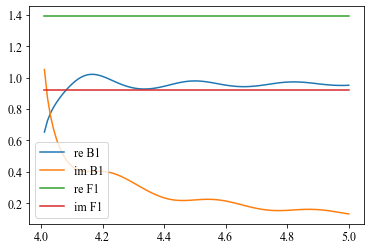

In [31]:
plt.plot(H2, np.real(B1), label='re B1')
plt.plot(H2, np.imag(B1), label='im B1')
plt.plot(H2, [np.real(F1)]*len(H2), label='re F1')
plt.plot(H2, [np.imag(F1)]*len(H2), label='im F1')
plt.legend()

In [147]:
ds_qian_dim['theta_pert_q'] = ds_qian_dim.bq*300/9.807
ds_qian_dim.theta_pert_q.attrs['units'] = 'K'
# ds_rotunno_dim['theta_pert_w'] = ds_rotunno_dim.bw*300/9.807
# ds_rotunno_dim.theta_pert_w.attrs['units'] = 'K'

## Piecewise N Derivation

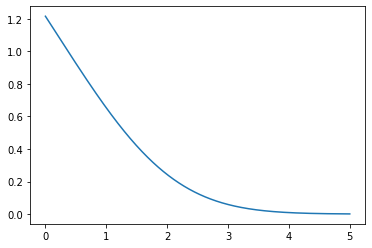

In [47]:
import mpmath
x=np.linspace(0.0001,5,1000)
pcfd_vec = np.frompyfunc(mpmath.pcfd,2,1)
y = pcfd_vec(-1/2,x).astype(np.complex64)
# y2 = sp.special.pbdv(-1/2,x)[0]
plt.plot(x,y)

In [36]:
def calc_theta(s,alpha=3):
    theta = (np.pi/2)*s**alpha
    return theta

def calc_k_3(theta,U):
    k = 1/(U*(1-np.sin(theta)))
    return k

def calc_k_2(theta,U):
    k = (1-np.sin(theta))/U
    return k

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-1.963414600811998e-05-2.9551497637216226e-06j)

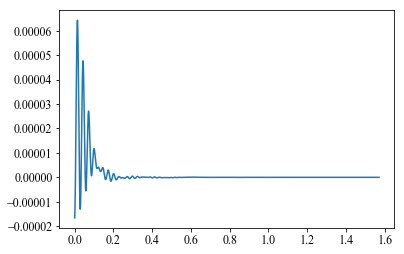

In [119]:
zet=11
zetaT=10
R=0.5
sN=5000
s=np.arange(1/sN,1,1/sN)
theta=calc_theta(s,alpha=1)
k2=calc_k_2(theta,2*np.pi)
k3=calc_k_3(theta,2*np.pi)
k=10*np.tan(theta)
# plt.plot(s,k2)
# plt.plot(s[0:790],10*np.tan(theta)[0:790],'.')
test=np.exp((1j*k-1)*zet)/k/(k**2+1)*(-np.sin(k*zet)*np.exp(1j*k/R*(zet-zetaT))+np.sin(k*zetaT)*np.exp(1j*k/R*(zetaT-zet)))
plt.plot(theta,test)
np.trapz(k,test)

In [23]:
from sympy import *

In [29]:
zet, zetap, L, zetaT, N1, N2, k, R, x = symbols('zeta zetap L zetaT N1 N2 k R x', real=True)
test = -1/k/(k**2+1)*exp(-L*k)/2*((-exp(-zet)*(sin(k*zet)+k*cos(k*zet))+k)*exp(-1j*k/R*zet)*exp(-1j*zetaT*(k-k/R)) - (1j*k-1)*exp((-1j*k-1)*zet)*sin(k*zetaT)*exp(-1j*k/R*zetaT)*exp(+1j*k/R*zet))

In [31]:
init_printing()

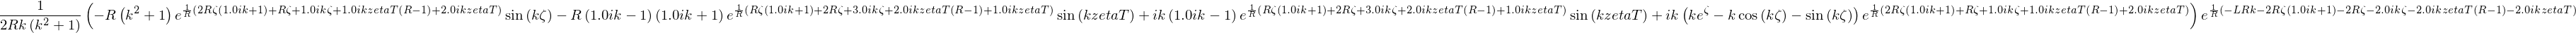

In [33]:
simplify(diff(test,zet))

In [32]:
str(simplify(diff(test,zet))).replace('I','1j').replace('exp','np.exp').replace('sin','np.sin').replace('cos','np.cos')

'(-R*(k**2 + 1)*np.exp((2*R*zeta*(1.0*1j*k + 1) + R*zeta + 1.0*1j*k*zeta + 1.0*1j*k*zetaT*(R - 1) + 2.0*1j*k*zetaT)/R)*np.sin(k*zeta) - R*(1.0*1j*k - 1)*(1.0*1j*k + 1)*np.exp((R*zeta*(1.0*1j*k + 1) + 2*R*zeta + 3.0*1j*k*zeta + 2.0*1j*k*zetaT*(R - 1) + 1.0*1j*k*zetaT)/R)*np.sin(k*zetaT) + 1j*k*(1.0*1j*k - 1)*np.exp((R*zeta*(1.0*1j*k + 1) + 2*R*zeta + 3.0*1j*k*zeta + 2.0*1j*k*zetaT*(R - 1) + 1.0*1j*k*zetaT)/R)*np.sin(k*zetaT) + 1j*k*(k*np.exp(zeta) - k*np.cos(k*zeta) - np.sin(k*zeta))*np.exp((2*R*zeta*(1.0*1j*k + 1) + R*zeta + 1.0*1j*k*zeta + 1.0*1j*k*zetaT*(R - 1) + 2.0*1j*k*zetaT)/R))*np.exp((-L*R*k - 2*R*zeta*(1.0*1j*k + 1) - 2*R*zeta - 2.0*1j*k*zeta - 2.0*1j*k*zetaT*(R - 1) - 2.0*1j*k*zetaT)/R)/(2*R*k*(k**2 + 1))'

In [41]:
import numpy as np
zet=20 
L=0.1
R=0.4
k = np.arange(1/2000, 30, 1/2000)
test = 1j*R/(2*k)*(1/2)*np.exp(-L*k)*(1j*k/R-1)/((k/R)**2+1)*np.exp(1j*k/R*zet)

In [42]:
np.trapz(k, test)

(-0.15686023413330158+0.42422161081643533j)

## Channel Testing

In [88]:
alpha=3
d=4
zeta=0
xi = np.linspace(-3,3,1000)
H = (1-1/(2**alpha)*(1-np.cos(2*np.pi*xi/d))**alpha)*np.heaviside(d/2-xi,0)*np.heaviside(d/2+xi,0)

dH = -np.pi*np.heaviside(d/2+xi,0)*np.sin(2*np.pi*xi/d)*np.heaviside(d/2-xi,0)/d
dH_alt = np.diff(H)/np.diff(xi)

dH2 = dH*(np.cos(2*np.pi*xi/d)-1)**2*3/4

In [160]:
def calc_psi1(xi,zeta,tau,k,U,d,sigma,r):
    m=k/(1+k*U)
    psi1 = (-4*np.pi*1j*sigma/2*np.sin(d*k/2)/(k**2+1)
            *(np.exp(1j*m*zeta)-np.exp(-zeta))
            *np.exp(1j*(k*xi+tau))*r(k,d))
    return psi1

def r3(k,d):
    r3 = (3*(d**4*k**4-40*np.pi**2*d**2*k**2+264*np.pi**4)
          /((2*np.pi-d*k)*(2*np.pi+d*k)
            *(4*np.pi-d*k)*(4*np.pi+d*k)
            *(6*np.pi-d*k)*(6*np.pi+d*k)))
    return r3

In [208]:
xi=np.linspace(-5,5,1000)
L=.01
d=4
H1 = 1/np.pi*(np.pi/2+np.arctan((xi+d/2)/L))
H2 = 1/np.pi*(np.pi/2+np.arctan((-xi+d/2)/L))
H3 = (H1+H2-2)

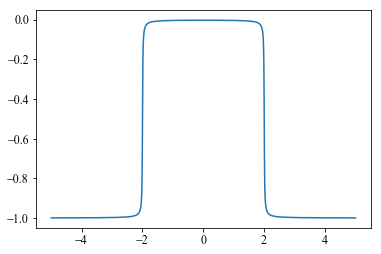

In [209]:
# plt.plot(xi,H1)
# plt.plot(xi,H2)
plt.plot(xi,H3)

In [108]:
k = np.linspace(0,5,5000)
p = calc_psi1(.1,.5,0,k,0,6,3,r3)

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


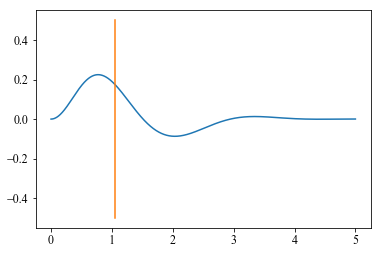

In [109]:
plt.plot(k,H)
plt.plot([2*np.pi/6,2*np.pi/6],[-.5,.5])

In [73]:
def r1(x):
    return 10
def r2(x):
    return 20

sigma=2

# Choose sigma polynomail
try:
    r = eval('r' + str(sigma))
except:
    print(('Invalid choice of sigma. \n'
           + 'sigma should be an int between 1 and 5. \n'
           + 'Defaulting to sigma = 2.'))
    sigma = 2
    r = eval('r' + str(sigma))

r(1)

Invalid choice of sigma. 
sigma should be an int between 1 and 5. 
Defaulting to sigma = 2.


20

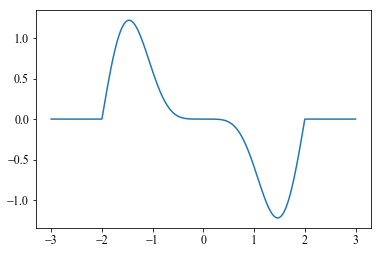

In [76]:
# plt.plot(xi,(H-1)*-1)
# plt.plot(xi,dH)
# plt.plot(xi[1:],dH_alt+1)
plt.plot(xi,dH2)

In [194]:
from sympy import *
import sympy as sp

In [195]:
x, a, k, D= symbols('x a k D')

In [196]:
init_printing()

In [6]:
sp.transforms._fourier_transform(dHsym, x, k, 1, -1, 'non-unitary',simplify=False)

IntegralTransformError: non-unitary Transform could not be computed: could not compute integral.

In [197]:
1F1(1/4,1/2,z) * e^(-z) * (cos(z)sinh(z)+sin(z)cosh(z))test = Heaviside(a-x)*DiracDelta(a+x)-Heaviside(a+x)*DiracDelta(a-x)
diff(test,x)

TypeError: '>' not supported between instances of 'NoneType' and 'int'

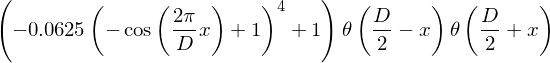

In [199]:
alpha=4
Hsym = (1-1/(2**alpha)*(1-cos(2*pi*x/D))**alpha)*Heaviside(D/2-x,0)*Heaviside(D/2+x,0)
Hsym

In [5]:
dHsym = diff(Hsym,x)
dHsym = - 1.0*pi*sin(2*pi*x/D)*Heaviside(D/2 - x, 0)*Heaviside(D/2 + x, 0)/D
dHsym

-1.0*pi*sin(2*pi*x/D)*Heaviside(D/2 - x, 0)*Heaviside(D/2 + x, 0)/D

## Rotunno Case One Dev

In [301]:
*[[1,2],[1,2]]

SyntaxError: can't use starred expression here (<ipython-input-301-1486483d8e6c>, line 1)

In [310]:
import itertools
inds = list(itertools.product(range(5),range(5)))[1:]
for [i,j] in inds:
    print(str(i)+str(j))

01
02
03
04
10
11
12
13
14
20
21
22
23
24
30
31
32
33
34
40
41
42
43
44


In [45]:
sN=1001
xi=2
s = np.arange(0,1+1/sN,1/sN)
alpha=3
theta = s**alpha*np.pi/2
xip = 2*xi-xi/(1-np.sin(theta))

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


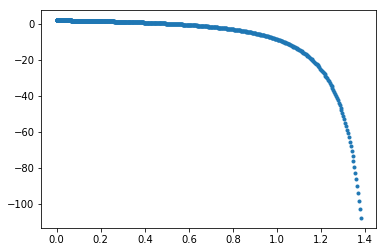

In [47]:
plt.plot(theta[:960],xip[:960],'.')

In [321]:
xip = [xip_minus, xip_plus]
xip[1].sum(axis=0)

-0.7449513398575752
-0.7450213475010908
-0.06741513647068674
-0.06748506562989355
-0.06748506562989355
-0.06748506562989355
-0.06748506562989355
-0.06748506562989355


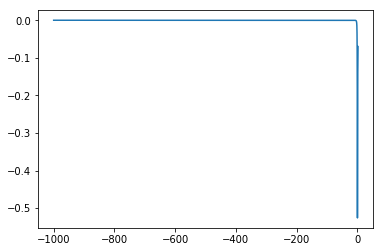

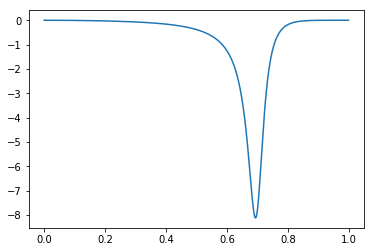

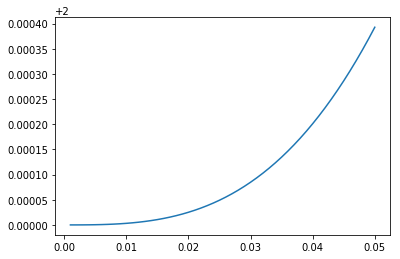

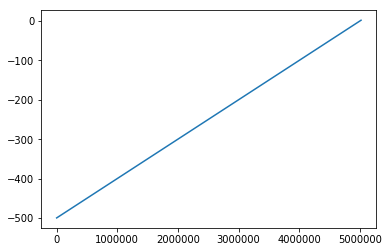

In [315]:
sN=1000
s = np.arange(1/sN,1,1/sN)
alpha=3
theta = s**alpha*np.pi/2
xip_minus = 2*xi-xi/(1-np.sin(theta))
xip_plus = xi/(1-np.sin(theta))

# zetap=np.linspace(0,10,1000)
# XIP, ZETAP = np.meshgrid(xip,zetap)
zetap=2
xi=2
zeta=1
xi0=0.5
fn1_minus = np.log(((xi-xip_minus)**2+(zeta-zetap)**2)/((xi-xip_minus)**2+(zeta+zetap)**2))*np.exp(-zetap)/(xip_minus**2+xi0**2)*xi/(1-np.sin(theta))**2*np.cos(theta)*alpha*s**(alpha-1)*np.pi/2
fn1_plus = np.log(((xi-xip_plus)**2+(zeta-zetap)**2)/((xi-xip_plus)**2+(zeta+zetap)**2))*np.exp(-zetap)/(xip_plus**2+xi0**2)*xi/(1-np.sin(theta))**2*np.cos(theta)*alpha*s**(alpha-1)*np.pi/2

w_minus = -(2*(xi-xip_minus)*(-(zeta-zetap)**2+(zeta+zetap)**2)
             /(((xi-xip_minus)**2+(zeta-zetap)**2)
               *((xi-xip_minus)**2+(zeta+zetap)**2)))
w_plus = -(2*(xi-xip_plus)*(-(zeta-zetap)**2+(zeta+zetap)**2)
             /(((xi-xip_plus)**2+(zeta-zetap)**2)
               *((xi-xip_plus)**2+(zeta+zetap)**2)))

u_minus = (2*((zeta-zetap)*((xi-xip_minus)**2
               +(zeta+zetap)**2)
               -(zeta+zetap)*((xi-xip_minus)**2
               +(zeta-zetap)**2))
            /(((xi-xip_minus)**2+(zeta-zetap)**2)
              *((xi-xip_minus)**2+(zeta+zetap)**2)))

u_plus = (2*((zeta-zetap)*((xi-xip_plus)**2
               +(zeta+zetap)**2)
               -(zeta+zetap)*((xi-xip_plus)**2
               +(zeta-zetap)**2))
            /(((xi-xip_plus)**2+(zeta-zetap)**2)
              *((xi-xip_plus)**2+(zeta+zetap)**2)))


dXip = 1/1000
xip_alt_minus = np.arange(-1000,xi,dXip)
fn1_alt_minus = np.log(((xi-xip_alt_minus)**2+(zeta-zetap)**2)/((xi-xip_alt_minus)**2+(zeta+zetap)**2))*np.exp(-zetap)/(xip_alt_minus**2+xi0**2)

xip_alt_plus = np.arange(xi+dXip,1000,dXip)
fn1_alt_plus = np.log(((xi-xip_alt_plus)**2+(zeta-zetap)**2)/((xi-xip_alt_plus)**2+(zeta+zetap)**2))*np.exp(-zetap)/(xip_alt_plus**2+xi0**2)
plt.plot(xip_alt_minus,fn1_alt_minus)
plt.figure()
plt.plot(s,fn1_minus)
plt.figure()
plt.plot(s[:50],xip_plus[:50])
plt.figure()
plt.plot(xip_alt)
print(np.trapz(fn1_alt_minus,xip_alt_minus))
print(np.trapz(fn1_minus,s))
print(np.trapz(fn1_alt_plus,xip_alt_plus))
print(np.trapz(fn1_plus,s))

print(np.trapz(fn1_plus,s))
print(np.trapz(fn1_plus,s))
print(np.trapz(fn1_plus,s))
print(np.trapz(fn1_plus,s))

In [21]:
5%2

In [148]:
np.log(((xi-xip_alt)**2+(zeta-zetap)**2)/((xi-xip_alt)**2+(zeta+zetap)**2))*np.exp(-zetap)/(xip_alt**2+xi0**2)


array([ 0.04908093,  0.04908174,  0.04908256, ..., -3.78036847,
       -3.96895674, -4.29155481])

In [141]:
fn1_alt.max()

0.0

In [9]:
from sympy import *

In [10]:
xi, xip, z, zp, xi0, epsilon_1, epsilon_2, r = symbols('xi xi_p zeta zeta_p xi0 \epsilon_1 \epsilon_2 r')

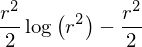

In [149]:
integrate(log(r**2)*r)

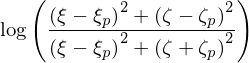

In [78]:
fn3 = log(((xi-xip)**2+(z-zp)**2)/((xi-xip)**2+(z+zp)**2))
fn3

In [16]:
init_printing()

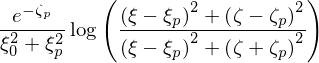

In [17]:
fn4 = (log(((xi-xip)**2+(z-zp)**2)/((xi-xip)**2+(z+zp)**2))*exp(-zp)/(xip**2+xi0**2))
# fn5 = -log((zeta-zetap)**2/(zeta+zetap)**2)*exp(-zeta)/(xi**2+xi0**2)
fn4

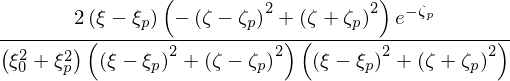

In [18]:
# limit(limit(simplify(diff(fn4, z)),zp,z),xip,xi)
# limit(limit(simplify(diff(fn4, z)),xip,xi),zp,z)
# limit(simplify(diff(fn4, z)).subs(zp,z),xip,xi)
# limit(limit(simplify(diff(fn4, xi)),zp,z),xip,xi)
simplify(diff(fn4, xi))

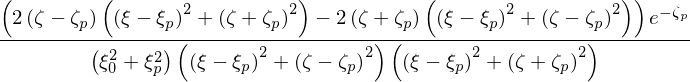

In [19]:
simplify(diff(fn4, z))

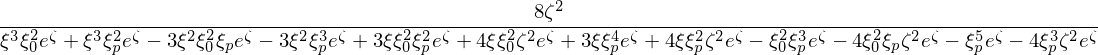

In [107]:
xip=np.linspace(-.1,.1,1000)
zetap=np.linspace(1.1,1.2,1000)

XIP, ZETAP = np.meshgrid(xip,zetap)

zeta=1.15
xi0=0.1
xi=0

y1 = np.log(((xi-XIP)**2+(zeta-ZETAP)**2)/((xi-XIP)**2+(zeta+ZETAP)**2))*np.exp(-ZETAP)/(XIP**2+xi0**2)
y2 = np.log(((xi-XIP)**2+(zeta-ZETAP)**2)/((xi-XIP)**2+(zeta+ZETAP)**2))*np.exp(-zeta)/(xi**2+xi0**2)

In [108]:
np.trapz(y1,xip,-1)

array([-36.6128718 , -36.62237273, -36.63188264, -36.64140155,
       -36.65092946, -36.66046638, -36.67001234, -36.67956734,
       -36.68913139, -36.69870451, -36.7082867 , -36.71787799,
       -36.72747838, -36.73708789, -36.74670653, -36.75633431,
       -36.76597124, -36.77561734, -36.78527262, -36.79493709,
       -36.80461077, -36.81429366, -36.82398578, -36.83368715,
       -36.84339777, -36.85311765, -36.86284682, -36.87258528,
       -36.88233305, -36.89209014, -36.90185655, -36.91163231,
       -36.92141743, -36.93121192, -36.94101579, -36.95082906,
       -36.96065174, -36.97048384, -36.98032537, -36.99017636,
       -37.0000368 , -37.00990672, -37.01978612, -37.02967502,
       -37.03957344, -37.04948139, -37.05939887, -37.0693259 ,
       -37.07926251, -37.08920869, -37.09916446, -37.10912984,
       -37.11910484, -37.12908947, -37.13908374, -37.14908767,
       -37.15910128, -37.16912457, -37.17915756, -37.18920026,
       -37.19925269, -37.20931486, -37.21938678, -37.22

In [124]:
integrate(fn4, zp)

KeyboardInterrupt: 

In [126]:
f6 = log(((xi-xip)**2+(z-zp)**2)/((xi-xip)**2+(z+zp)**2))*(xip-xi) + 2*(z-zp)*atan((z-zp)/(xi-xip))-2*(z+zp)*atan((z+zp)/(xi-xip))
integrate(f6, zp)

KeyboardInterrupt: 

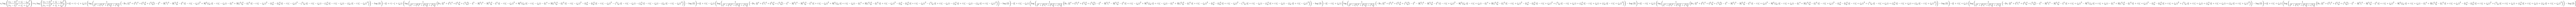

In [84]:
simplify(integrate(fn3,(xip,-epsilon_1,epsilon_1)))

In [158]:
fn = log(((xi-xip)**2+(z-zp)**2)/((xi-xip)**2+(z+zp)**2))*exp(-zp)/(xip**2+xi0**2)
fn_alt = log(((xi-xip)**2+(z-zp)**2)/((xi-xip)**2+(z+zp)**2))*exp(-z)/(xip**2+xi0**2)

integrate(fn_alt, (z, 0, oo))


KeyboardInterrupt: 

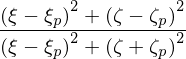

In [73]:
fn_2 = ((xi-xip)**2+(zeta-zetap)**2)/((xi-xip)**2+(zeta+zetap)**2)
fn_2
fn_2

In [4]:
init_printing()

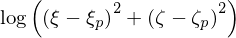

In [152]:
fn

In [17]:
simplify(integrate(integrate(fn, (xip, -oo, oo)), (zetap, 0, oo)))
# simplify(limit(integrate(fn, (xip, -epsilon_1, epsilon_1)),epsilon_1,oo))

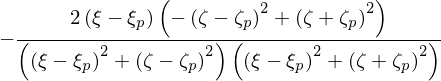

In [39]:
w=-simplify(diff(fn,xi))
w

In [103]:
limit(limit(fn,zeta,0),zetap,0)

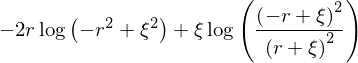

In [151]:
integrate(log((xi-r)**2/(xi+r)**2), xi)

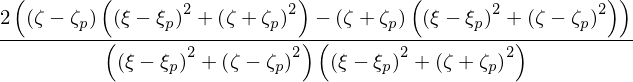

In [44]:
u=simplify(diff(fn,zeta))
u

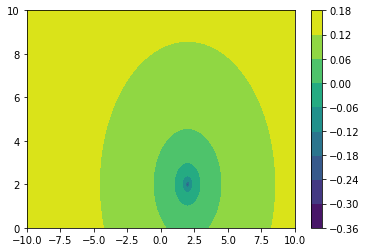

In [130]:
xip=np.linspace(-10,10,1000)
zetap=np.linspace(0,10,1000)
XIP, ZETAP = np.meshgrid(xip,zetap)
xi=2
zeta=2
xi0=0.5
fn1 = np.log(((xi-XIP)**2+(zeta-ZETAP)**2))*np.exp(-ZETAP)/(XIP**2+xi0**2)
# fn2 = np.log(((xi-XIP)**2+(zeta-ZETAP)**2)/((xi-XIP)**2+(zeta+ZETAP)**2))*np.exp(-zeta)/(xi**2+xi0**2)
fn2 = np.log(((xi-XIP)**2+(zeta-ZETAP)**2))*np.exp(-zeta)/(xi**2+xi0**2)
plt.contourf(XIP,ZETAP,fn2)
plt.colorbar()

In [119]:
print(np.trapz(np.trapz(fn1-fn2, zetap, axis=1), zetap)+np.trapz(np.trapz(fn2, zetap, axis=1), zetap))
print(np.trapz(np.trapz(fn1, zetap, axis=1), zetap))

-2.46299703057527
-2.46299703057527


/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


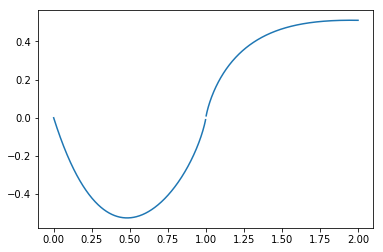

In [16]:
x=np.linspace(0,2,1001)
# y=np.log((x-1)**2/(x+1)**2)[]
y1=(np.exp(-x))*np.log((x-1)**2/(x+1)**2)
y2=(np.exp(-1))*np.log((x-1)**2/(x+1)**2)
plt.plot(x,y)

In [72]:
np.any(np.isinf(fn))

False

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ,
       1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09])

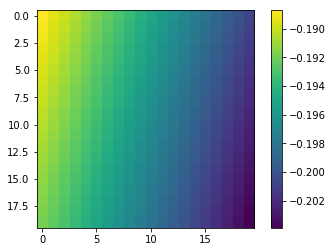

In [64]:
plt.imshow(fn[540:560,90:110])
plt.colorbar()
# xip[540:560]
zetap[90:110]

<function matplotlib.pyplot.show(*args, **kw)>

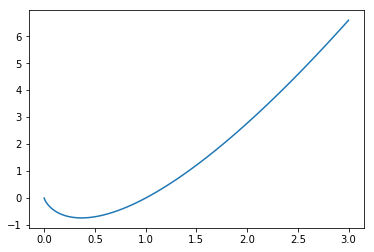

In [22]:
xx  = np.arange(1/100000,3,1/100000)
plt.plot(xx,xx*np.log(xx**2));plt.show

## Buoyancy debug

In [53]:
from sympy import *

In [54]:
kappa, U, x, tau, L, theta =symbols('kappa U x tau L theta')
kappaU = 1/U

In [57]:
init_printing()

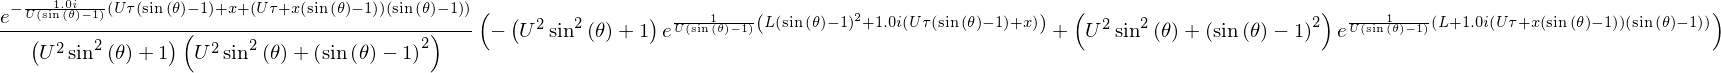

In [58]:
C3 = exp(-kappa*L)/(kappa**2+(U*kappa-1)**2)*exp(1j*(kappa*x-tau))*kappa**2
C2 = exp(-kappa*L)/(kappa**2+(U*kappa-1)**2)*exp(1j*(kappa*x-tau))
kappa2 = kappaU*(1-sin(theta))
kappa3 = kappaU/(1-sin(theta))
simplify(C3.subs(kappa,kappa3)-C2.subs(kappa,kappa2)*kappaU**2)

In [ ]:
expression = (kappa/(kappa*U-1))/(kappa**2+(U*kappa-1)**2)*exp(-kappa*L)*exp(I*(kappa*x-tau))-(2*kappaU-kappa)/(kappa*U-1)/((2*kappaU-kappa)**2+(kappa*U-1)**2)*exp(-1*(2*kappaU-kappa)*L)*exp(I*((2*kappaU-kappa)*x-tau))

In [ ]:
simplify(expression)

In [ ]:
init_printing()
expression

In [ ]:
limit(expression,kappa,kappaU)

In [ ]:
simplify(cancel(factor(cancel(expand(exp)))))

In [ ]:
theta_alt = ((1-cos(s*pi))/(2))**(alpha)*pi/2

In [ ]:
theta_alt.subs(alpha,5)

In [ ]:
diff(theta_alt.subs(alpha,2),s)

In [ ]:
init_printing()

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: ComplexWarning: Cas

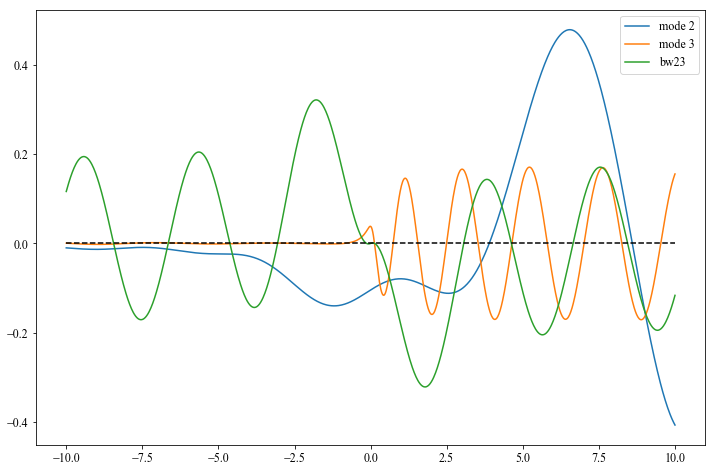

In [76]:
plt.close('all')
power=6
tau=np.pi/2
zeta=2
alpha=3
U=.6
L=0.1
sN=4000
dS=1/sN

s=np.arange(dS,1,dS, dtype=np.float32)
xi=np.linspace(-10,10,1000, dtype=np.float32)
theta=qian_helpers.calc_theta(s,alpha)

k2 = qian_helpers.calc_k_2(theta,U)
k3 = qian_helpers.calc_k_3(theta,U)
k0_2 = qian_helpers.calc_k_2(0,U)
k0_3 = qian_helpers.calc_k_3(0,U)
bw23=np.zeros(xi.size)
bw23_alt=np.zeros(xi.size)
bw23a=np.zeros(xi.size)
bw23b=np.zeros(xi.size)
bw2b=np.zeros(xi.size)
bw2ba=np.zeros(xi.size)
bw2c=np.zeros(xi.size)
bw3b=np.zeros(xi.size)
bw3c=np.zeros(xi.size)

for i in range(xi.size):
    bw23a_ig = (1/np.tan(theta)
               *(
                 -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
#                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
               *alpha*s**(alpha-1)*np.pi/2)
    bw23b_ig = (1/np.tan(theta)
               *(
#                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
                 +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
               *alpha*s**(alpha-1)*np.pi/2)
    bw23_ig = ((-qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2/np.tan(theta)
                +qian_helpers.calc_C3(xi[i],tau,k3,U,L)/np.tan(theta))
               *alpha*s**(alpha-1)*np.pi/2)
    
    s_app=np.concatenate(([0],s,[1]))
    bw23_ig_app=np.concatenate(([0],bw23_ig,[0]))
    
#     bw23_ig_alt = calc_test(xi[i],zeta,tau,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
    
    bw23a[i] = np.trapz(bw23a_ig,s)*1/2*np.exp(-zeta)
    bw23b[i] = np.trapz(bw23b_ig,s)*1/2*np.exp(-zeta)
    bw23[i] = np.trapz(bw23_ig_app,s_app)*1/2*np.exp(-zeta)
#     bw23_alt[i] = np.trapz(bw23_ig_alt,s)*1/2*np.exp(-zeta)
  
    bw2b[i] = np.trapz(qian_helpers.calc_bw2b(xi[i],zeta,tau,s,alpha,U,L),s)
    bw2c[i] = (1/(2*U**2)*np.exp(1j*zeta/U)
               *qian_helpers.calc_C2(xi[i],tau,k0_2,U,L)
               *qian_helpers.calc_exp1(1j*zeta/U))
  
    bw3b[i] = np.trapz(qian_helpers.calc_bw3b(xi[i],zeta,tau,s,alpha,U,L),s)
    bw3c[i] = (-1/2*qian_helpers.calc_C3(xi[i],tau,k0_3,U,L)
               *qian_helpers.calc_exp1(-1j*zeta/U))
    
    # Calc psi2
    psi2a_ig = qian_helpers.calc_psi2a(xi[i],zeta,tau,s,alpha,U,L)
    psi2b_ig = qian_helpers.calc_psi2b(xi[i],zeta,tau,s,alpha,U,L)
    
    psi2c = (-1/(2*U)*np.exp(1j*zeta/U)
             *qian_helpers.calc_C2(xi[i],tau,k0_2,U,L)
             *qian_helpers.calc_ep0(-1j*zeta/U))

    psi2ab = np.trapz(psi2a_ig+psi2b_ig, s)
    bw2ba[i] = (psi2ab+psi2c)/U
        
# plt.figure(figsize=(12,8))
# plt.plot(xi,bw23a,label='bw23a')
# plt.plot(xi,bw23b,label='bw23b')
# plt.plot(xi,bw23_alt,label='bw23')
# plt.plot(xi,np.zeros(xi.size),'--k')
# plt.plot(xi,bw2b,label='bw2b')
# plt.plot(xi,bw2c,label='bw2c')
# plt.plot(xi,bw3b,label='bw3b')
# plt.plot(xi,bw3c,label='bw3c')
# plt.plot(s,k2,'.')
# plt.plot(s[0:4000],k3[0:4000]-1.25,'.')

# plt.figure(figsize=(12,8))
# plt.plot(s[0:800],k3[0:800],'.')

# plt.legend()
# plt.show()
plt.figure(figsize=(12,8))

# plt.plot(xi,bw2ba,label='bw2ba')
# plt.plot(xi,bw3b+bw3c+bw2b,label='bw3b+bw3c')
# plt.plot(xi,bw2b+bw2ba+bw2c+bw3b+bw3c+bw23,label='all')
plt.plot(xi,bw2b+bw2ba+bw2c,label='mode 2')
plt.plot(xi,bw3b+bw3c,label='mode 3')
# plt.plot(xi,bw2ba,label='bw2ba')
# plt.plot(xi,bw2b+bw3b,label='bw2b+bw3b')
# plt.plot(xi,bw23_alt,label='bw23_alt')
# plt.plot(xi,bw23a,label='bw23a')
# plt.plot(xi,bw23b,label='bw23b')
plt.plot(xi,bw23,label='bw23')

# plt.plot(xi,bw23+bw2ba,label='bw23')
# plt.plot(xi,bw3b+bw3c+bw23+bw23+bw2c,label='all')
# plt.plot(xi,bw23a+bw23b,label='bw23a+bw23b')
# plt.plot(xi,bw23,label='bw23')
plt.plot(xi,np.zeros(xi.size),'--k')
plt.legend()
plt.show()

In [ ]:
plt.plot(k3_alt[0:4000])

In [ ]:
bw23_ig_app[np.isnan(bw23_ig_app)]=0

In [ ]:
bw23_ig_app

In [ ]:
print(bw23b_ig[-1])
print(bw23a_ig[-1])
print(bw23_ig[-1])

print(bw23b_ig[0])
print(bw23a_ig[0])
print(bw23_ig[0])

In [ ]:
s_app=np.concatenate(([0],s,[1]))
bw23_ig_app=np.concatenate(([0],bw23_ig,[0]))

plt.plot(s_app,bw23_ig_app)
plt.plot(s_app,np.zeros(s_app.size),'--k');
plt.show()

# plt.plot(s[200:],bw23a_ig[200:])
# plt.plot(s[200:],bw23b_ig[200:])

In [ ]:

k2_app = np.concatenate((k2,[0]))
plt.plot(k2_app[-10:],'.'); plt.show()

In [ ]:
plt.plot(bw23a_ig); plt.show()

In [ ]:
plt.plot(s[0:30000],k3[0:30000],'.')
plt.plot(s,k2,'.')

In [69]:
def calc_theta_alt(s,alpha=1):
    theta_alt = ((1-np.cos(s*np.pi))/(2))**(alpha)*np.pi/2
    return theta_alt

def calc_dtheta_alt(s,alpha=1):
    dtheta_alt = (np.pi/2*alpha*((1-np.cos(s*np.pi))/2)**(alpha-1)
                  *np.sin(s*np.pi)*np.pi/2)
    return dtheta_alt

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(s[200:2500],k3[200:2500],'.',size=0.1)

In [ ]:
plt.plot(s,k2,'.')

In [24]:
# plt.plot(s,theta_alt)
alpha=0.75
theta_alt=calc_theta_alt(s,alpha)
k2 = qian_helpers.calc_k_2(theta_alt,U)
k3 = qian_helpers.calc_k_3(theta_alt,U)

plt.plot(s,calc_theta_alt(s, alpha))
# plt.plot(s,calc_theta_alt(s))
# k2_alt = qian_helpers.calc_k_2(calc_theta_alt(s),U)
# k3_alt = qian_helpers.calc_k_3(calc_theta_alt(s),U)
# plt.plot(s[0:100],k3_alt[0:100],'.')
plt.plot(s,calc_dtheta_alt(s,alpha=alpha))
plt.plot(s,k2)
plt.plot(s[:-3000],k3[:-3000])

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x7fb577629320>:
--%<----------------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/errors.py", line 491, in new_error_context
    yield
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 194, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 138, in propagate
    constraint(typeinfer)
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 195, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/errors.py", line 499, in new_error_context
    six.reraise(type(newerr), newerr, tb)
  File "/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numba/six.py", line 659, in reraise
    raise value
numba.errors.InternalError: [33m[1m[33m[1m[0m
[0m[37m[1m[1] During: typing of argument at /home/student.unimelb.edu.au/shorte1/Documents/rotunno83/python_scripts/qian_helpers.py (463)[0m
--%<----------------------------------------------------------------------------

[37m[1m
File "qian_helpers.py", line 463:[0m
[34m[1mdef calc_k_2(theta,U):
[31m[1m    k = (1-np.sin(theta))/U
[0m    [32m[1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: Unsupported array dtype: float128

This is not usually a problem with Numba itself but instead often caused by
the use of unsupported features or an issue in resolving types.

To see Python/NumPy features supported by the latest release of Numba visit:
http://numba.pydata.org/numba-doc/dev/reference/pysupported.html
and
http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

For more information about typing errors and how to debug them visit:
http://numba.pydata.org/numba-doc/latest/user/troubleshoot.html#my-code-doesn-t-compile

If you think your code should work with Numba, please report the error message
and traceback, along with a minimal reproducer at:
https://github.com/numba/numba/issues/new


(-2.9132987685698026+2.797086101339573j)
(2.645840079481666-3.070445058517016j)
(-0.26745868908813675-0.2733589571774431j)
(-0.26745868908813564-0.2733589571774416j)
(-0.2674586890881356-0.2733589571774415j)


/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


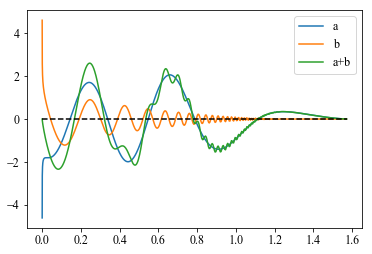

In [71]:
x=-10
alpha=3
U=0.6
tau=3
L=0.1
sN=1000
dS=1/sN
zeta=2

s=np.arange(dS,1,dS,dtype=np.float32)
theta=calc_theta_alt(s,alpha)

k2 = qian_helpers.calc_k_2(theta,U)
k3 = qian_helpers.calc_k_3(theta,U)
k0_2 = qian_helpers.calc_k_2(0,U)
k0_3 = qian_helpers.calc_k_3(0,U)

# bw23a_ig = (1/np.tan(theta)
#                *(
#                  -qian_helpers.calc_C2(x,tau,k2,U,L)/U**2
# #                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
#                 )
#                *alpha*s**(alpha-1)*np.pi/2)
# bw23b_ig = (1/np.tan(theta)
#            *(
# #                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
#              +qian_helpers.calc_C3(x,tau,k3,U,L)
#             )
#            *alpha*s**(alpha-1)*np.pi/2)

bw23a_ig = (1/np.tan(theta)*np.exp(-zeta)
               *(
                 -qian_helpers.calc_C2(x,tau,k2,U,L)/U**2
#                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
#                *alpha*s**(alpha-1)*np.pi/2)*1/2*np.exp(-zeta)
                *calc_dtheta_alt(s,alpha))
bw23b_ig = (1/np.tan(theta)*np.exp(-zeta)
           *(
#                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
             +qian_helpers.calc_C3(x,tau,k3,U,L)
            )
#            *alpha*s**(alpha-1)*np.pi/2)*1/2*np.exp(-zeta)
            *calc_dtheta_alt(s,alpha))
bw23_ig = (1/np.tan(theta)*np.exp(-zeta)
           *(
             -qian_helpers.calc_C2(x,tau,k2,U,L)/U**2
             +qian_helpers.calc_C3(x,tau,k3,U,L)
            )
#            *alpha*s**(alpha-1)*np.pi/2)*1/2*np.exp(-zeta)
            *calc_dtheta_alt(s,alpha))

where_nan = np.logical_or(np.isnan(bw23a_ig),np.isnan(bw23b_ig))
bw23a_ig[where_nan]=0
bw23b_ig[where_nan]=0
bw23_ig[np.isnan(bw23_ig)]=0

plt.plot(theta[100:],bw23a_ig[100:],label='a')
plt.plot(theta[100:],bw23b_ig[100:],label='b')
# plt.plot(theta,(bw23b_ig+bw23a_ig),label='a+b')
plt.plot(theta,bw23_ig, label='a+b')
plt.plot(theta, np.zeros(theta.size),'--k')
plt.legend()

# s_app = np.concatenate(([0],s,[1]))
# bw

print(np.trapz(bw23a_ig,s))
print(np.trapz(bw23b_ig,s))
print(np.trapz(bw23a_ig,s)+np.trapz(bw23b_ig,s))
print(np.trapz(bw23a_ig+bw23b_ig,s))
print(np.trapz(bw23_ig,s))


In [ ]:
plt.plot(np.tan(np.arange(0,np.pi/8,np.pi/(2*5000)))+1/U,'.')

In [ ]:
# Alternative approach
sN=2000
dk = (1/U)/sN
s=np.arange(1/sN,1,1/sN)
U=0.5
L=0.5
alpha=1

k2 = (1-s**alpha)/U

k3 = np.tan((np.arange(0,1+1/sN,1/sN))*np.pi/2)+2/U
x=10
tau=0
zeta=0.00001

def calc_exp_terms(xi,tau,k,L):
    return np.exp(-k*L)*np.exp(1j*(k*xi-tau))

# bw2a_ig = qian_helpers.calc_C2(x,tau,k2,U,L)*k2/(U*k2-1)*alpha*s**(alpha-1)
bw2a_ig = qian_helpers.calc_C2(x,tau,k2,U,L)*k2*alpha*s**(alpha-1)
# bw2a_ig_alt = qian_helpers.calc_C2(x,tau,k2,U,L)*alpha*s**(alpha-1)
bw2a_ig[np.isinf(bw2a_ig)]=0

k2P = -k2+2/U

# bw3a1_ig = qian_helpers.calc_C2(x,tau,k2P,U,L)*k2P/(1-U*k2)*alpha*s**(alpha-1)
bw3a1_ig = qian_helpers.calc_C2(x,tau,k2P,U,L)*k2P*alpha*s**(alpha-1)
# bw3a1_ig_alt = qian_helpers.calc_C2(x,tau,k2P,U,L)*alpha*s**(alpha-1)
bw3a1_ig[np.isinf(bw3a1_ig)]=0

bw3a2_ig = qian_helpers.calc_C2(x,tau,k3,U,L)*k3/(U*k3-1)

# plt.plot(k2[-10:],'o')
# plt.plot(k3[:10],'o')
# plt.plot(k3[:10]*0+2,'--')

# *np.exp(-zeta)

lb=0
ub=100

# plt.plot(s,bw2a_ig+bw3a1_ig)
plt.plot(s,bw2a_ig,label='bw2a')
plt.plot(s,bw3a1_ig, label='bw3a1')
plt.plot(s,(-bw3a1_ig+bw2a_ig)/(k2*U-1), label='sum')
plt.legend()
print(np.trapz((-bw3a1_ig+bw2a_ig)/(k2*U-1),s))
plt.plot()
# plt.plot(k2,bw2a_ig)
plt.figure()
plt.plot(np.arange(0,1+1/sN,1/sN),bw3a2_ig)
print(np.trapz(bw3a2_ig,k3))

# plt.plot(np.concatenate((bw2a_ig,bw3a_ig)))
# print(np.trapz(bw2a_ig[:100],k2[:100]))
# print(np.trapz(bw3a_ig[100:],k3[100:]))
# print(np.trapz(bw2a_ig[-100:],k2[-100:]))
# print(np.trapz(bw3a_ig[0:100],k3[0:100]))

In [ ]:
-2*0.5*np.exp(-1)-2*0.5*np.exp(-1)

In [ ]:
((-bw3a1_ig+bw2a_ig)/(k2*U-1))[0]

In [ ]:
(-bw3a1_ig+bw2a_ig)

In [ ]:
print(bw2a_ig[0:5])
print(bw3a1_ig[0:5])

In [ ]:
plt.plot(s,k2)

In [ ]:
(bw2a_ig)[:10]
(bw3a1_ig)[:10]

In [ ]:
print(bw3a1_ig[[0,-1]])
print(bw2a_ig[[0,-1]])

In [ ]:
(bw2a_ig+bw3a1_ig)[-1]

In [ ]:
(bw2a_ig+bw3a1_ig)[-10:]

In [ ]:
plt.plot(k2P)

In [ ]:
np.trapz(bw3a2_ig,s)

In [ ]:
lb=0
ub=None
print(np.trapz(bw23_ig[lb:ub],s[lb:ub]))
print(theta[lb])
print(theta[ub])
print('k2 bounds')
print(k2[lb])
print(k2[ub])
print('k3 bounds')
print(k3[lb])
print(k3[ub])

In [ ]:
bw23_ig.max()

In [ ]:
plt.plot(k3[0:800],'.')

In [ ]:
np.logical_or(np.isnan(bw23a_ig),np.isnan(bw23b_ig))

# bw23b_ig[-10:]

In [ ]:
plt.plot(theta)

In [ ]:
ig=(bw23b_ig+bw23a_ig)
ig[np.isnan(bw23b_ig+bw23a_ig)]=0
np.trapz(ig,s)

In [ ]:
bw23_ig_alt_1 = calc_test(-10.00,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_2 = calc_test(-10.20,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_3 = calc_test(-10.40,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_4 = calc_test(-10.60,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2

plt.plot(bw23_ig_alt_1)
print(np.trapz(bw23_ig_alt_1,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_2)
print(np.trapz(bw23_ig_alt_2,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_3)
print(np.trapz(bw23_ig_alt_3,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_4)
print(np.trapz(bw23_ig_alt_4,s)*1/2*np.exp(-zeta))

In [ ]:
k3[8000]

In [ ]:
len(k2)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(s[0:500],k3[0:500],'.')